/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


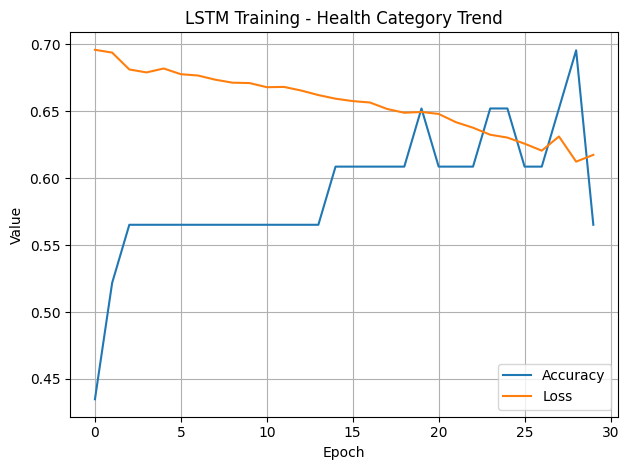

In [ ]:
!pip install tensorflow matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Simulate 30 days of food category logs
np.random.seed(42)
days = 30
X_data = []

for _ in range(days):
    healthy = np.random.randint(1, 4)
    unhealthy = np.random.randint(0, 4)
    once = np.random.randint(0, 3)
    X_data.append([healthy, unhealthy, once])

X_data = np.array(X_data)

# Labels: 1 if unhealthy > healthy that day
y_data = np.array([1 if row[1] > row[0] else 0 for row in X_data])

# Create 7-day sequences
time_steps = 7
X_seq, y_seq = [], []

for i in range(len(X_data) - time_steps):
    X_seq.append(X_data[i:i+time_steps])
    y_seq.append(y_data[i+time_steps])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Build the LSTM
model = Sequential([
    LSTM(32, input_shape=(time_steps, 3)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_seq, y_seq, epochs=30, batch_size=4, verbose=0)

# Plot
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title("LSTM Training - Health Category Trend")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
model.save("habit_lstm.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
=== Classification Report ===
                 precision    recall  f1-score   support

       Balanced       0.79      0.85      0.81        13
Unhealthy Trend       0.78      0.70      0.74        10

       accuracy                           0.78        23
      macro avg       0.78      0.77      0.78        23
   weighted avg       0.78      0.78      0.78        23


=== Confusion Matrix ===
[[11  2]
 [ 3  7]]


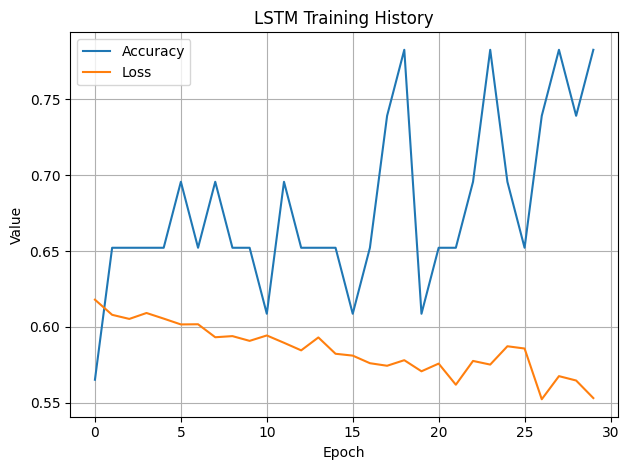

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Train the model and capture the training history
history_obj = model.fit(X_seq, y_seq, epochs=30, batch_size=4, verbose=0)

# Use the returned history object
history = history_obj.history

# Prediction
y_pred_probs = model.predict(X_seq)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Classification report
print("=== Classification Report ===")
print(classification_report(y_seq, y_pred, target_names=["Balanced", "Unhealthy Trend"]))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_seq, y_pred))

# Plot
plt.plot(history['accuracy'], label='Accuracy')
plt.plot(history['loss'], label='Loss')
plt.title("LSTM Training History")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Phase 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#Generate synthetic CNN label data (0=Healthy, 1=Occasional, 2=Unhealthy)
np.random.seed(42)
total_days = 100
cnn_labels = np.random.choice([0, 1, 2], size=total_days, p=[0.4, 0.3, 0.3])  # Simulated CNN outputs

#Build 7-day sequences
sequence_length = 7
X, y = [], []

def label_trend(seq):
    unhealthy = sum(1 for i in seq if i == 2)
    occasional = sum(1 for i in seq if i == 1)
    # Strict rule:
    return 1 if (unhealthy >= 3 or (unhealthy + occasional) >= 5) else 0

for i in range(len(cnn_labels) - sequence_length):
    seq = cnn_labels[i:i + sequence_length]
    label = label_trend(seq)
    one_hot_seq = tf.keras.utils.to_categorical(seq, num_classes=3)
    X.append(one_hot_seq)
    y.append(label)

X = np.array(X)
y = np.array(y)

print(f" Created {len(X)} sequences. Shape: {X.shape}")



 Created 93 sequences. Shape: (93, 7, 3)


train

In [ ]:

#Build the improved LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, 3)),
    LSTM(32),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train
history = model.fit(X, y, epochs=40, batch_size=8, validation_split=0.2, verbose=0)

#Evaluation
y_pred_probs = model.predict(X)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()


# Save the model
model.save("habit_lstm_strict.keras")
print("Phase 2 LSTM model saved as 'habit_lstm_strict.keras'")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step
Phase 2 LSTM model saved as 'habit_lstm_strict.keras'


In [ ]:
!cp habit_lstm_strict.keras /content/drive/MyDrive/
print("Model copied to Drive: MyDrive/habit_lstm_strict.keras")

Model copied to Drive: MyDrive/habit_lstm_strict.keras



=== Classification Report ===
                 precision    recall  f1-score   support

       Balanced       1.00      0.98      0.99        53
Unhealthy Trend       0.98      1.00      0.99        40

       accuracy                           0.99        93
      macro avg       0.99      0.99      0.99        93
   weighted avg       0.99      0.99      0.99        93


=== Confusion Matrix ===
[[52  1]
 [ 0 40]]


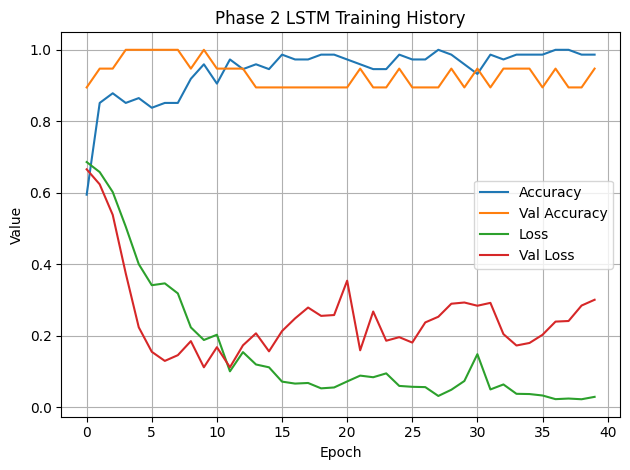

In [ ]:
print("\n=== Classification Report ===")
print(classification_report(y, y_pred, target_names=["Balanced", "Unhealthy Trend"]))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y, y_pred))

# 6. Plot
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Phase 2 LSTM Training History")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#training with real data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#load and process the user history
history_file = "user_history.txt"

def load_user_data(history_file, sequence_length=7):
    with open(history_file, "r") as f:
        lines = [int(line.strip().split(',')[0]) for line in f.readlines()]

    X, y = [], []

    def label_trend(seq):
        unhealthy = sum(1 for i in seq if i == 2)
        occasional = sum(1 for i in seq if i == 1)
        # Stricter rule:
        return 1 if (unhealthy >= 3 or (unhealthy + occasional) >= 4) else 0

    for i in range(len(lines) - sequence_length):
        seq = lines[i:i + sequence_length]
        label = label_trend(seq)
        one_hot_seq = tf.keras.utils.to_categorical(seq, num_classes=3)
        X.append(one_hot_seq)
        y.append(label)

    return np.array(X), np.array(y)

X_data, y_data = load_user_data(history_file)
print(f"Loaded {len(X_data)} sequences for training.")

# Build the LSTM Model
model = Sequential([
    LSTM(32, input_shape=(X_data.shape[1], X_data.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the Model
history = model.fit(X_data, y_data, epochs=20, batch_size=4, validation_split=0.2, verbose=1)

#Save the New Model
model.save("habit_lstm_realdata.keras")
print("LSTM model retrained and saved as 'habit_lstm_realdata.keras'")


Loaded 38 sequences for training.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.1152 - loss: 0.7373 - val_accuracy: 0.8750 - val_loss: 0.6871
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5214 - loss: 0.6914 - val_accuracy: 0.8750 - val_loss: 0.6509
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9122 - loss: 0.6430 - val_accuracy: 0.8750 - val_loss: 0.6186
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9349 - loss: 0.5969 - val_accuracy: 0.8750 - val_loss: 0.5788
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8890 - loss: 0.5631 - val_accuracy: 0.8750 - val_loss: 0.5344
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8992 - loss: 0.4948 - val_accuracy: 0.8750 - val_loss: 0.4796
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8916 - loss: 0.4351 - val_accuracy: 0.8750 - val_loss: 0.4205
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8126 - loss: 0.4526 - val_accuracy: 0.8750 - val_loss: 0.3841
Epoch 9/20
8/8

In [2]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the saved model
model = load_model("habit_lstm_realdata.keras")

# Load test data (same method you used for training)
X_test, y_test = load_user_data("user_history.txt")

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Print classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Balanced", "Unhealthy Trend"]))

# Print confusion matrix
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 460ms/step

=== Classification Report ===
                 precision    recall  f1-score   support

       Balanced       0.00      0.00      0.00         4
Unhealthy Trend       0.89      1.00      0.94        34

       accuracy                           0.89        38
      macro avg       0.45      0.50      0.47        38
   weighted avg       0.80      0.89      0.85        38


=== Confusion Matrix ===
[[ 0  4]
 [ 0 34]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load and process the user history
history_file = "user_history.txt"

def load_user_data(history_file, sequence_length=7):
    with open(history_file, "r") as f:
        lines = [int(line.strip().split(',')[0]) for line in f.readlines()]

    X, y = [], []

    def label_trend(seq):
        unhealthy = sum(1 for i in seq if i == 2)
        occasional = sum(1 for i in seq if i == 1)
        return 1 if (unhealthy >= 3 or (unhealthy + occasional) >= 4) else 0

    for i in range(len(lines) - sequence_length):
        seq = lines[i:i + sequence_length]
        label = label_trend(seq)
        one_hot_seq = tf.keras.utils.to_categorical(seq, num_classes=3)
        X.append(one_hot_seq)
        y.append(label)

    return np.array(X), np.array(y)

X_data, y_data = load_user_data(history_file)
print(f"Loaded {len(X_data)} sequences for training.")

# Calculate class weights (Balanced)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_data),
    y=y_data
)

class_weights = dict(enumerate(class_weights))
print(f"Class weights: {class_weights}")


Loaded 38 sequences for training.
Class weights: {0: np.float64(4.75), 1: np.float64(0.5588235294117647)}


In [4]:
# Build the LSTM Model
model = Sequential([
    LSTM(32, input_shape=(X_data.shape[1], X_data.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the Model with class weights
history = model.fit(
    X_data, y_data,
    epochs=30,
    batch_size=4,
    validation_split=0.2,
    class_weight=class_weights,
    verbose=1
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.0948 - loss: 0.6719 - val_accuracy: 0.1250 - val_loss: 0.7095
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1138 - loss: 0.6191 - val_accuracy: 0.1250 - val_loss: 0.7057
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2380 - loss: 0.7055 - val_accuracy: 0.2500 - val_loss: 0.7013
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6268 - loss: 0.6671 - val_accuracy: 0.3750 - val_loss: 0.6949
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7555 - loss: 0.8750 - val_accuracy: 0.3750 - val_loss: 0.6958
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8312 - loss: 0.5801 - val_accuracy: 0.5000 - val_loss: 0.6869
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8529 - loss: 0.5643 - val_accuracy: 0.5000 - val_loss: 0.6865
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8668 - loss: 0.5374 - val_accuracy: 0.5000 - val_loss: 0.6769


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
 Classification Report 
                 precision    recall  f1-score   support

       Balanced       0.57      1.00      0.73         4
Unhealthy Trend       1.00      0.91      0.95        34

       accuracy                           0.92        38
      macro avg       0.79      0.96      0.84        38
   weighted avg       0.95      0.92      0.93        38

 Confusion Matrix
[[ 4  0]
 [ 3 31]]


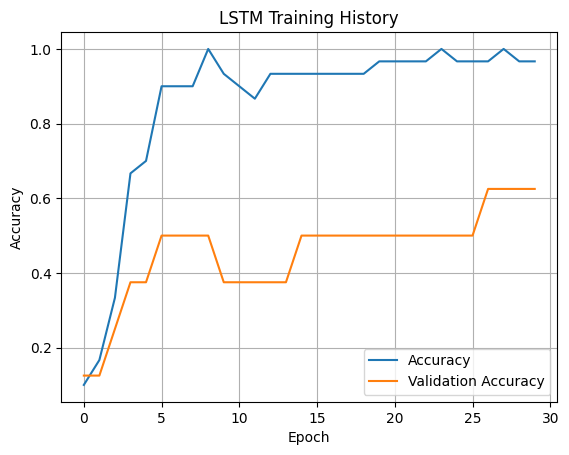

In [9]:
# Evaluate the Model
y_pred_probs = model.predict(X_data)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Classification report
print(" Classification Report ")
print(classification_report(y_data, y_pred, target_names=["Balanced", "Unhealthy Trend"]))

print(" Confusion Matrix")
print(confusion_matrix(y_data, y_pred))

# Plot Training History
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Training History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Save the New Model
model.save("habit_lstm_realdata_balanced.keras")
print("Improved LSTM model saved as 'habit_lstm_realdata_balanced.keras'")


Improved LSTM model saved as 'habit_lstm_realdata_balanced.keras'
